# CAPM (Capital asset pricing model)
\begin{align*}
E(R_i ) = R_f + \beta_i \big(E(R_M)-R_f   \big)
\end{align*}

where 
- $E(R_i)=$(expected return on asset i), 
- $R_f=$(risk free rate), 
- $E(R_M)=$(expected return on market return, such as, KOSPI or S&P500).

\begin{align*}
\beta_i = \frac{cov(R_i, R_M)}{var(R_M)}
\end{align*}

In [17]:
import sys
import pandas as pd
import datetime as dt
import numpy as np
import quandl
import matplotlib.pyplot as plt 
from fredapi import Fred

plt.style.use('ggplot')
start = dt.datetime(2010, 1, 1)
end  = dt.datetime.now()

In [18]:
aapl = quandl.get('WIKI/AAPL', trim_start = start, authtoken = auth_tok)
data = fred.get_series('SP500', start = start)

In [19]:
df = pd.DataFrame()
df['aapl'] = aapl['Adj. Close']
df['snp'] = data

In [20]:
ret = 100* ((df - df.shift(-1))/df.shift(-1))
ret = ret.dropna()

In [21]:
x = ret['snp'].values
y = ret['aapl'].values

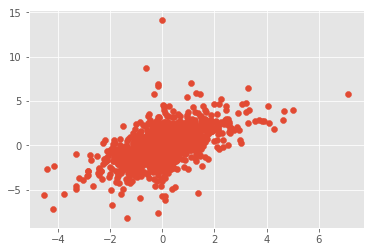

In [22]:
plt.scatter(x,y)

C:\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


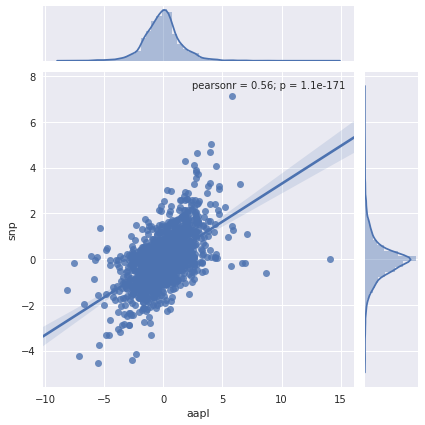

In [27]:
import seaborn as sns

with plt.style.context('seaborn'):
    sns.jointplot("aapl", "snp", data=ret, kind='reg')

In [25]:
from statsmodels.formula.api import ols 
model_ols = ols('aapl~1+snp', data=ret).fit()
model_ols.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   aapl   R-squared:                       0.314
Model:                            OLS   Adj. R-squared:                  0.314
Method:                 Least Squares   F-statistic:                     948.0
Date:                Thu, 06 Sep 2018   Prob (F-statistic):          1.14e-171
Time:                        08:42:08   Log-Likelihood:                -3517.3
No. Observations:                2069   AIC:                             7039.
Df Residuals:                    2067   BIC:                             7050.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.0405      0.029     -1.390      0.165      -0.098       0.017
snp            0.9521      0.031     30.789      0.000       0.891       1.013
==============================================================================
Omnibus:                      495.851   Durbin-Watson:                   1.923
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             9358.464
Skew:                           0.630   Prob(JB):                         0.00
Kurtosis:                      13.343   Cond. No.                         1.07
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [42]:
retMonthly = ret.asfreq('m', method='bfill')

In [ ]:
from statsmodels.formula.api import ols 
monthly_ols = ols('aapl~-1+snp', data=retMonthly).fit()
monthly_ols.summary()

In [43]:
from statsmodels.formula.api import ols 
monthly_ols = ols('aapl~1+snp', data=retMonthly).fit()
monthly_ols.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   aapl   R-squared:                       0.363
Model:                            OLS   Adj. R-squared:                  0.357
Method:                 Least Squares   F-statistic:                     54.82
Date:                Thu, 06 Sep 2018   Prob (F-statistic):           5.07e-11
Time:                        16:14:23   Log-Likelihood:                -162.71
No. Observations:                  98   AIC:                             329.4
Df Residuals:                      96   BIC:                             334.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.1241      0.130     -0.954      0.343      -0.382       0.134
snp            0.8395      0.113      7.404      0.000       0.614       1.065
==============================================================================
Omnibus:                       18.535   Durbin-Watson:                   2.077
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               62.296
Skew:                          -0.468   Prob(JB):                     2.97e-14
Kurtosis:                       6.792   Cond. No.                         1.16
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [59]:
from statsmodels.formula.api import ols 

coefs_a = []
coefs_b = []
tvalues_a = []
tvalues_b = []

j = 36
while j <= len(retMonthly):
    data = retMonthly.iloc[j-36:j, :]
    coefs = ols('aapl~1+snp', data=data).fit().params
    coefs_a.append(coefs[0])
    coefs_b.append(coefs[1])
    tvalues = ols('aapl~1+snp', data=data).fit().tvalues
    tvalues_a.append(tvalues[0])
    tvalues_b.append(tvalues[1])
    j += 1

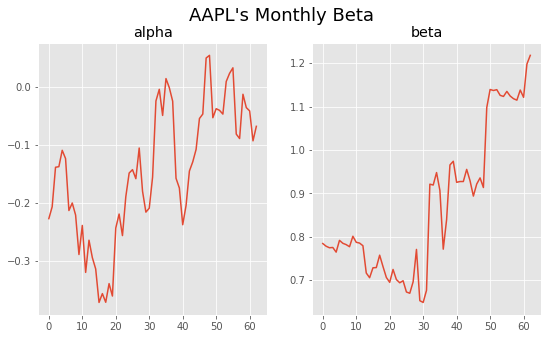

In [89]:
fig, ax = plt.subplots(1,2, figsize=(9,5))

ax[0].plot(coefs_a)
ax[0].set_title("alpha")
ax[1].plot(coefs_b)
ax[1].set_title("beta")
plt.suptitle("AAPL's Monthly Beta", fontsize=18);

## Interpretation of CAPM

**I assume that portfolio is composed of one asset and $R_f=0$**

\begin{align*}
R_i  = -0.041 + 0.952^{**} R_M 
\end{align*}

- How to measure whether a fund manager add value beyond investing in the index? 
   Or how well did the fund manager do compared to  
   benchmark?    $\Rightarrow$     **CAPM alpha**

- CAPM alpha shows return not captured by the market
  - In empirics CAPM alpha is -0.041 and statistically insignificant (that is not meaningful in natural language) 
  - If alpha is statistically significant, then we cay say that the manager subtracts decremental return of -4.1% per day beyond the benchmark

-  CAPM beta is a measure how sensitive the portfolio return to overall market
-  It is called “systematic risk” or “market risk”
   - undiversifiable risk
   - risk premium 
-  If the market goes up by 1%, then portfolio return up by 0.95%
  -  defensive(countercyclical) stock: 𝛽≤1
  -  pro-cyclical stock: 𝛽≥1


## IS CAPM sensible?

-  Investors are compensated for taking necessary risk, but not for unnecessary risk
    - Market risk is inescapable and borne by aggregate investors
    - However, residual risk is SELF-IMPOSED and is avoidable risk. 
    -  On average non-zero  residual risks come from overweighting stock exactly matched by other investor(s) taking opposite position: <br>
     ⇒  Greater Fool Theory
-  So, investors who don’t have superior information should hold the market portfolio
        ⇒ Passive Investing Strategy



## CAPM's Contribution
-  Empirical results supporting the model is limited or very scarce, however, market participants are using for remuneration or world portfolio composition or consulting for new industry
-  Identify systematic and non-system risk with very simple model
-  Identify risk factor(s) $\beta_i$



## CAPM's Limitation

-  what is market portfolio? 
  -  S&P500, NASDAQ, World Porfolio 
-  Roll’s critique: estimated $\beta_i$ cannot predict future returns
- Three factor models by Fama and French: along with market return, price-to-book ratio, size of capitalization (small cap) do matter explaining excess return



## Market neutral Strategy

- If a fund manager believe the following CAPM estimation results and confident about it, then she/he will be facing negative alpha?
\begin{align*}
(R_p - R_f)  = 0.4 + 0.9^{**} (R_M - R_f)
\end{align*}

- How to neutralized it?  $\Rightarrow$   Bodie, Kane, and Marcus (2005, sec 10.4)
    - construct tracking portfolio matching systematic component of $R_p$:  
    \begin{align*}
      R_TP &= \beta R_M + (1-\beta) R_f \\
      R_{TP} &= 0.9R_M + 0.1R_f \\
      \big( R_{TP} - R_f  \big) &= 0.9 \big(R_M - R_f   \big)
    \end{align*}
    
    - Go long with $R_p$ and short with $R_{TP}$ ($R_p - R_{TP})$. Then manager earn fixed 4% return  